Import necessary packages: Numpy, Pandas, matplotlib

In [272]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [273]:
path_to_train = './Data/zip.train'
path_to_test = './Data/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. Note the only difference is
# that we don't load as many ones as we load zeros.

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1][:30]
X_train = np.vstack((X_train_0, X_train_1))

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1][:30]
y_train = np.hstack((y_train_0, y_train_1))

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1][:12]
X_test = np.vstack((X_test_0, X_test_1))

y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1][:12]
y_test = np.hstack((y_test_0, y_test_1))
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(371, 256)
(371,)
(1224, 256)
(1224,)


In [274]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


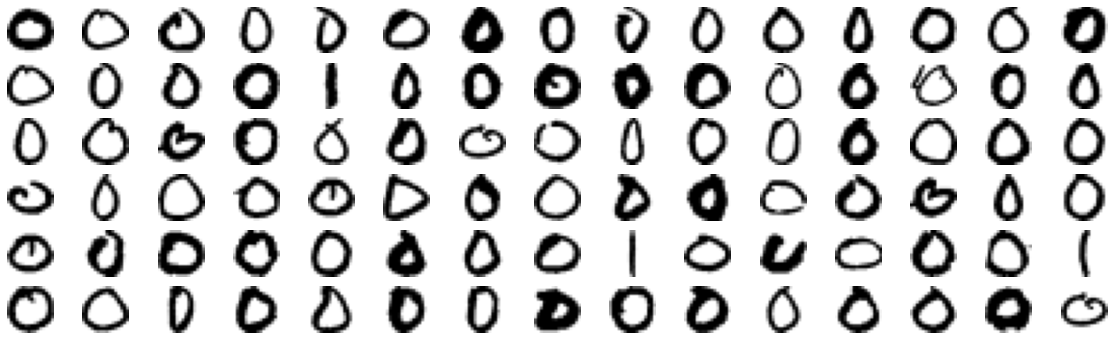

In [275]:
show_numbers(X_test)

Choose one of the classifiers you implemented and use it on the following task: Take a look at the provided notebook. It loads the ZIP-Code’s zeros and ones, but now there are manymore zeros than there are ones. We are going to believe that these digits represent geneticdata. Actually, we are virologists trying to develop a test to determine which of the data belongs to infected patients (the ones) and which do not (the zeros). Train/apply your model on the data and do the tasks of the exercise.

#  For this task we decided to use KNN to train the data 

In [290]:
class KNearestNeighbors():
    '''
    Think about defining more functions that will help you building this algorithm.
    Optimally, one that takes in k and a test image as a parameter.
    '''
    def predict(self, X_test, k):       # As suggested, a function that takes in k and a test image as a parameter.
        predict_results = []
        for i in X_test:
            squared_distances = self.squared_euclidean_distance(self.X, i)
            indices = np.argpartition(squared_distances, k)[:k]   # get the indices of k values with smaller distances
            answer_indices = (self.y[indices])       # get the value of the label corresponding to index
            #print(answer_indices)
            list = answer_indices.tolist()           # turn numpy array into a normal list to use count
            majority = max(list, key=list.count)     # get the value with the most occurrences
            #print(majority)
            predict_results += [majority]            # add it to a result list
        return(predict_results)
                    
    def fit(self, x, y):     #fit X_train, y_train together
        self.X = x
        self.y = y
            
    def squared_euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis = 1)

    def correctness(self, right_answer, predict_result):
        return np.mean(right_answer == predict_result)
    
    def variance(self, prediction, y_new_test):
        return np.var(y_new_test != prediction)
    
kNN = KNearestNeighbors()
# squared_distances = kNN.squared_euclidean_distance(X_train, X_test[0])

In [291]:
kNN.fit(X_train, y_train)

prediction1 = kNN.predict(X_test, 1)     # k=1
prediction2 = kNN.predict(X_test, 2)
prediction3 = kNN.predict(X_test, 3)
prediction4 = kNN.predict(X_test, 4)
prediction5 = kNN.predict(X_test, 5)
prediction6 = kNN.predict(X_test, 6)

#print(prediction)

print(kNN.correctness(y_test, prediction1))
print(kNN.correctness(y_test, prediction2))
print(kNN.correctness(y_test, prediction3))
print(kNN.correctness(y_test, prediction4))
print(kNN.correctness(y_test, prediction5))
print(kNN.correctness(y_test, prediction6))


0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425
0.9973045822102425


(90,)


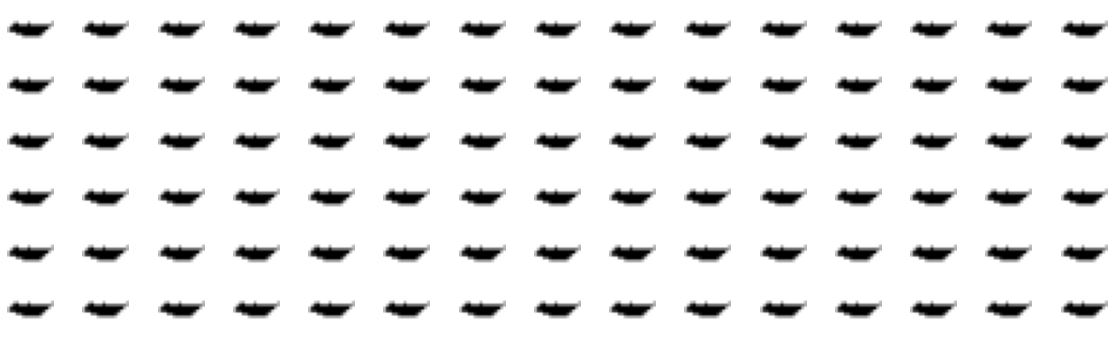

In [292]:
wrong = X_test[(prediction1 != y_test)]   # numbers that are classified incorrectly
show_numbers(wrong)

#### Randomize the dataset

In [293]:
def implemented_shuffle(X_total, y_total):
    n = X_total.shape[0]
    for i in range(0, n):
        j = random.randint(i, n - 1)
        X_total[j], X_total[i] = X_total[i], X_total[j]
        y_total[j], y_total[i] = y_total[i], y_total[j]
    return X_total, y_total

#### Combine the training set and test set into a total dataset

In [294]:
X_total = np.vstack((X_test, X_train))
y_total = np.hstack((y_test, y_train))
X_total, y_total = implemented_shuffle(X_total, y_total)

print(X_total.shape)
print(y_total.shape)

print(1595/5)

(1595, 256)
(1595,)
319.0


#### Split in k-fold, return i-te fold as test-set, others as train-set

In [295]:
def get_k_fold_data(k, i, X_total, y_total):
    fold_size = X_total.shape[0] // k
    test_start = i * fold_size
    if i != k-1:
        test_end = (i+1) * fold_size
        X_test, y_test = X_total[test_start:test_end], y_total[test_start:test_end]
        X_train = np.vstack((X_total[:test_start], X_total[test_end:]))
        y_train = np.hstack((y_total[:test_start], y_total[test_end:]))
    else:
        X_test, y_test = X_total[test_start:], y_total[test_start:]
        X_train = X_total[:test_start]
        y_train = y_total[:test_start]
        
    return X_train, y_train, X_test, y_test

In [296]:
# Manual data set grouping in early stages

# X_1 = X_total[:319]
# X_2 = X_total[319:319*2]
# X_3 = X_total[319*2:319*3]
# X_4 = X_total[319*3:319*4]
# X_5 = X_total[319*4:319*5]
# print(X_1.shape)

# y_1 = y_total[:319]
# y_2 = y_total[319:319*2]
# y_3 = y_total[319*2:319*3]
# y_4 = y_total[319*3:319*4]
# y_5 = y_total[319*4:319*5]
# print(y_1.shape)


### Exercise 1. Cross-Validation 
#### 5-fold Cross-Validation

K-fold Cross Validation results in distribution of lossvalues. 

mean(= Bias) tell us about the average error of the model.

Variance tell us about the Error spread around the mean.

The larger the K, the more data is put into each training set and the smaller the Bias of the model. However, a higher K means that the correlation before each selected training set is higher. This large correlation results in a final test error with a greater Variance.

As a rule of thumb, we generally choose k = 5 or 10.

In this exercise we choose k = 5


In [304]:
k = 5
for i in range(k):
    X_train1, y_train1, X_test1, y_test1 = get_k_fold_data(k, i, X_total, y_total)
    kNN.fit(X_train1,y_train1)
    prediction = kNN.predict(X_test1, 1)
    print("accuracy:", kNN.correctness(y_test1, prediction))
    print("Bias:     " + str(round(1 - kNN.correctness(y_test1, prediction),6)))
    print("Variance: " + str(round(kNN.variance(prediction, y_test1),6)))
    print("")

accuracy: 0.9435736677115988
Bias:     0.056426
Variance: 0.053242

accuracy: 0.9529780564263323
Bias:     0.047022
Variance: 0.044811

accuracy: 0.9780564263322884
Bias:     0.021944
Variance: 0.021462

accuracy: 0.9498432601880877
Bias:     0.050157
Variance: 0.047641

accuracy: 0.9623824451410659
Bias:     0.037618
Variance: 0.036202



### Exercise 2. Confusion Matrix

In [305]:
def confusion_matrix(prediction, y_test):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for i in range(y_test.shape[0]):
        # right prediction
        if(prediction[i] == y_test[i]): 
            if(y_test[i] == 1):
                true_positive += 1
            else:
                true_negative += 1
        # wrong prediction
        else:                           
            if(prediction[i] == 1):
                false_positive += 1
            else:
                false_negative += 1
    return np.array([[true_positive, false_positive], [false_negative, true_negative]])

### (a)

In [306]:
sum_matrix = np.zeros((2,2), dtype = np.int64)

k = 5
for i in range(k):
    X_train1, y_train1, X_test1, y_test1 = get_k_fold_data(k, i, X_total, y_total)
    kNN.fit(X_train1,y_train1)
    prediction = kNN.predict(X_test1, 1)

    matrix = confusion_matrix(prediction, y_test1)
    sum_matrix += matrix
    
    print("accuracy:", kNN.correctness(y_test1, prediction))
    print("Bias:     " + str(round(1 - kNN.correctness(y_test1, prediction),6)))
    print("Variance: " + str(round(kNN.variance(prediction, y_test1),6)))
    print("confusion matrix:")
    print(matrix)
    print("")

print("total confusion matrix:")
print(sum_matrix)


accuracy: 0.9435736677115988
Bias:     0.056426
Variance: 0.053242
confusion matrix:
[[  1   9]
 [  9 300]]

accuracy: 0.9529780564263323
Bias:     0.047022
Variance: 0.044811
confusion matrix:
[[  1   8]
 [  7 303]]

accuracy: 0.9780564263322884
Bias:     0.021944
Variance: 0.021462
confusion matrix:
[[  0   1]
 [  6 312]]

accuracy: 0.9498432601880877
Bias:     0.050157
Variance: 0.047641
confusion matrix:
[[  0   5]
 [ 11 303]]

accuracy: 0.9623824451410659
Bias:     0.037618
Variance: 0.036202
confusion matrix:
[[  0   5]
 [  7 307]]

total confusion matrix:
[[   2   28]
 [  40 1525]]


### (b)

If Accuracy is used to evaluate the classifier when the number of samples in most classes (majority class) far exceeds the number of samples in other classes, then high Accuracy can be obtained even if the model performance is poor (e.g. predicted for majority class regardless of what samples are entered). At this point, although the Accuracy Score is high, it is not very meaningful. The shortcomings of the Accuracy assessment method are particularly significant when the data are unusually unbalanced.

The F1-score is a combination of Precision and Recall.
Obviously, we do not want to miss a patient (improve recall), nor do we want to misjudge a normal person who is not ill (improve precision), so it is necessary to weigh up both recall and precision.


In [307]:
# (Positive) Precision: /Positive PredictiveValue (PPV)
print("Positive Precision: ", end="")
pos_precision = sum_matrix[0][0] / (sum_matrix[0][0] + sum_matrix[0][1])
print(pos_precision)

# Negative Precision
print("Negative Precision: ", end="")
precision = sum_matrix[1][1] / (sum_matrix[1][0] + sum_matrix[1][1])
print(precision)

# Sensitivity / True Positive Rate (TPR)
print("recall: ", end="")
recall = sum_matrix[0][0] / (sum_matrix[0][0] + sum_matrix[1][0])
print(recall)

# F1 Score-Harmonic mean of sensitivity and precision
print("f1: ", end="")
f1 = 2 / (1 / pos_precision + 1 / recall)
print(f1)

Positive Precision: 0.06666666666666667
Negative Precision: 0.9744408945686901
recall: 0.047619047619047616
f1: 0.05555555555555555


### (c)

It is difficult to conclude whether such a test is recommended.

In general, whether a test is satisfactory or not depends on the requirements of the tester, which need to weigh up both recall and precision.
More in favour of Recall, i.e. "no patient is missed".
More towards Precision, i.e. "try not to misdiagnose a person who is not ill, leading to the possibility that a patient may be missed".

However, the small size of our dataset and the extremely unbalanced sample distribution within it (only 12 samples for "1") resulted in a poor fit of the model and the problems of accuracy mentioned in (b).

In [308]:
print(str(round(sum_matrix[0][0] / X_total.shape[0] * 100, 5)) + "%")

0.12539%
